In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:

%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
!kaggle datasets download -d spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 1.12MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  students-performance-in-exams.zip
replace StudentsPerformance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Questions to explore

gender and score                                 

parental level of education and score

lunch and score

test preparation and score

race and lunch relation

score of top 10% vs below                                            10% in all departments 

ethnicty and lunch

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


looking for null values


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

exploring gender count


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


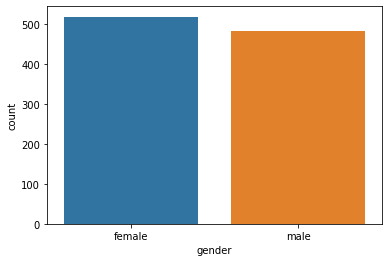

In [ ]:
sns.countplot(df['gender'])

exploring distribution count in maths, writing and reading scores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

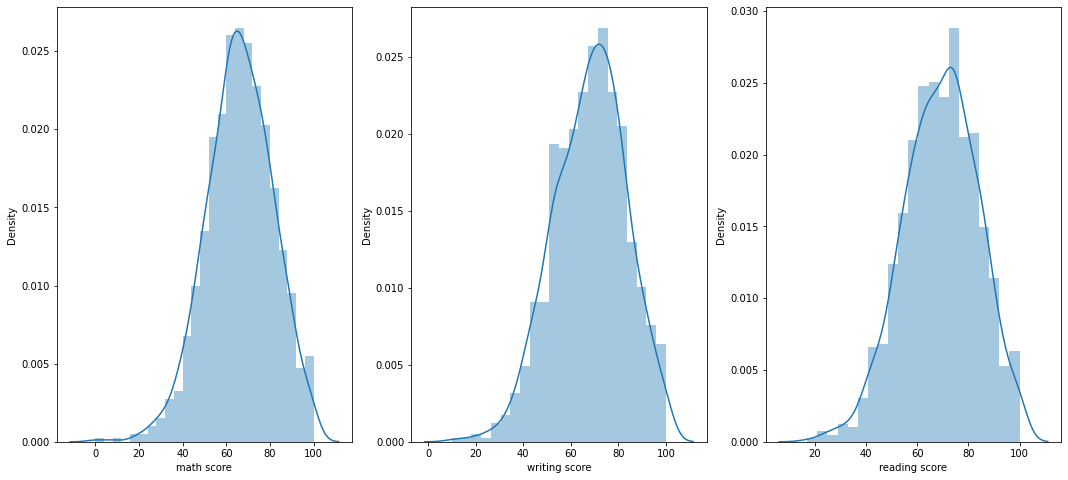

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.distplot(df['math score'])
plt.subplot(1,3,2)
sns.distplot(df['writing score'])
plt.subplot(1,3,3)
sns.distplot(df['reading score'])

exploring ethnicity count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


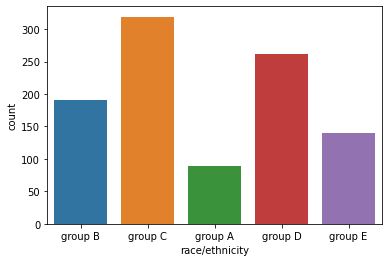

In [ ]:
sns.countplot(df['race/ethnicity'])

In [ ]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

seeing if maths, reaing and writing score have any correlation among themselves

In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
d=df.corr()

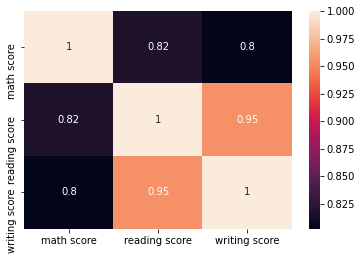

In [ ]:
sns.heatmap(d,annot=True)

and not surpirsingly there seems to be a better correlation between reading and writing scores

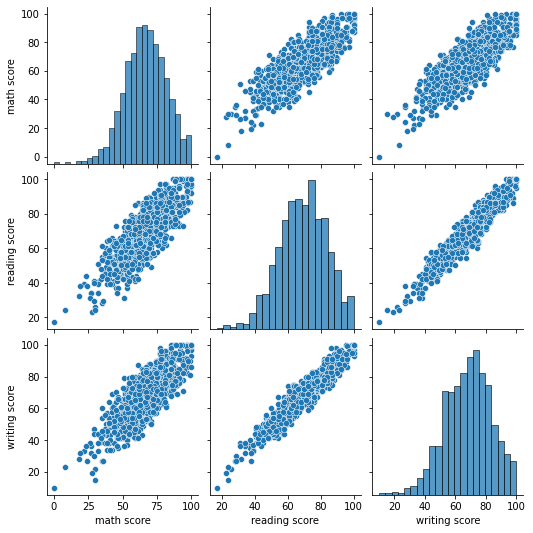

In [ ]:
sns.pairplot(df)

exploring parental level of education and test scores

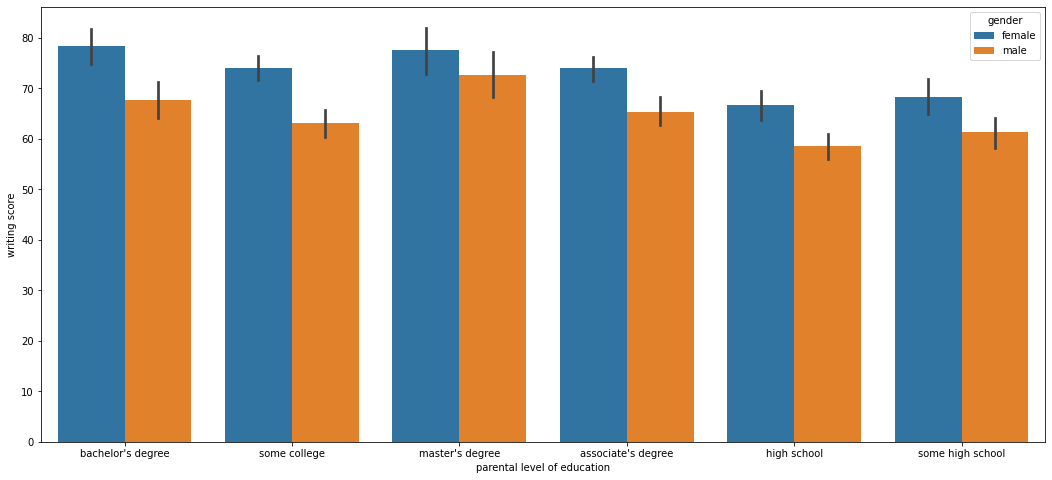

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x = "parental level of education", y = "writing score", hue = "gender", data = df)

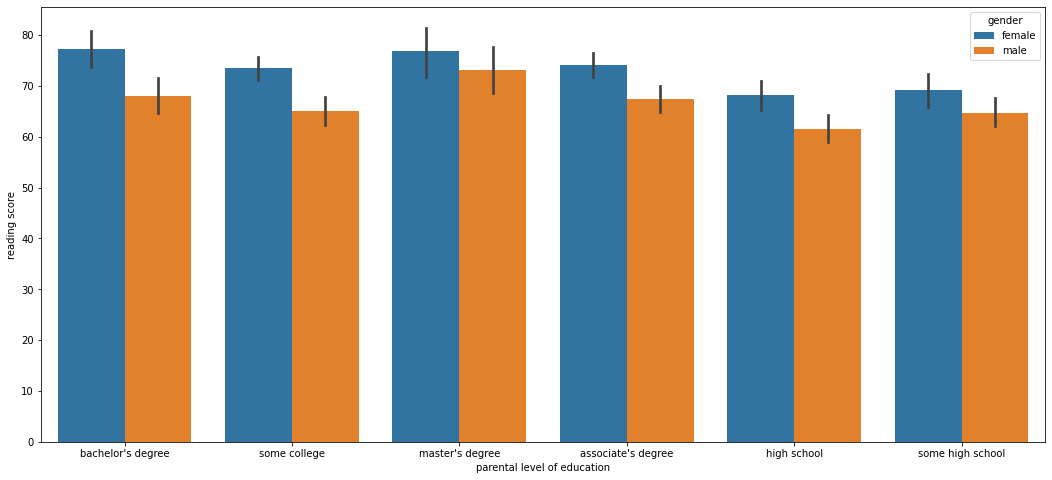

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x = "parental level of education", y = "reading score", hue = "gender", data = df)

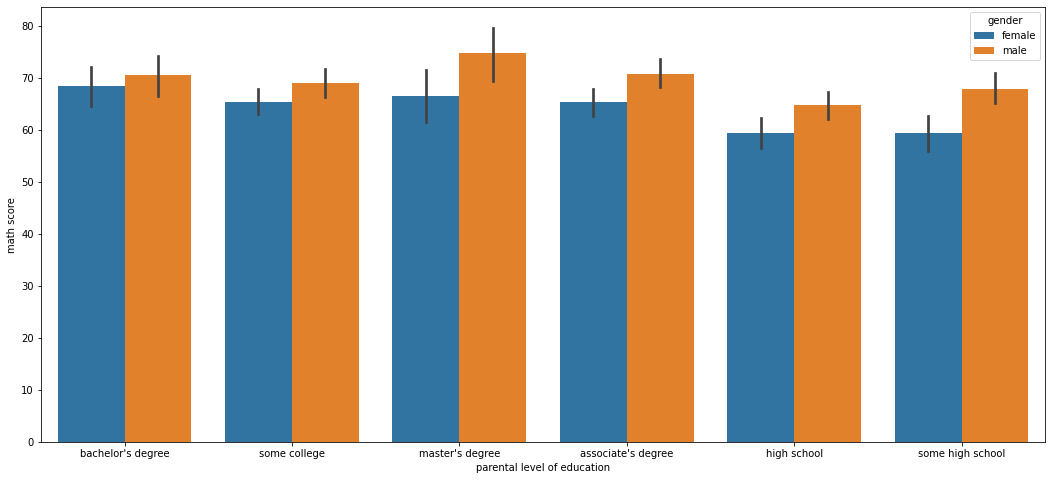

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x = "parental level of education", y = "math score", hue = "gender", data = df)

exploring test preparation course's impact on test scores

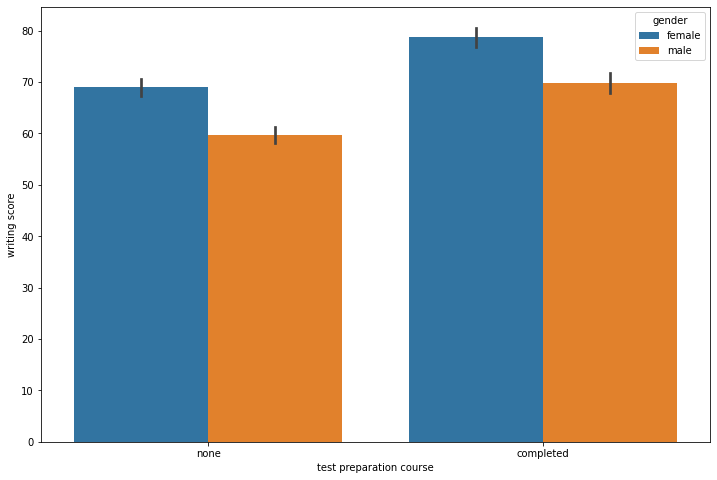

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x = "test preparation course", y = "writing score", hue = "gender", data = df)

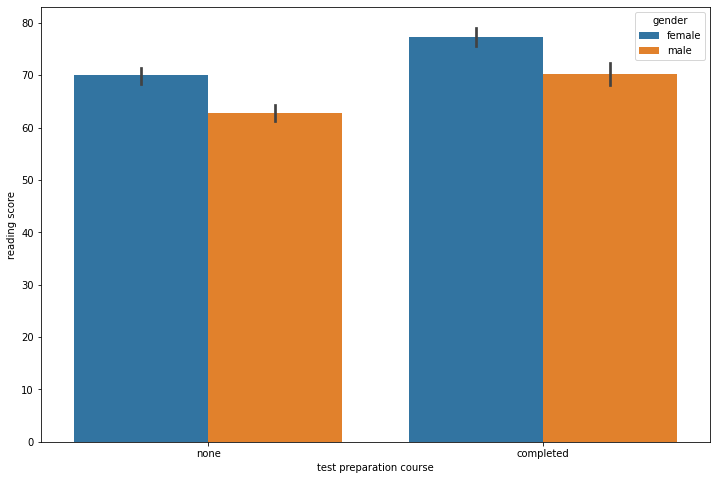

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x = "test preparation course", y = "reading score", hue = "gender", data = df)

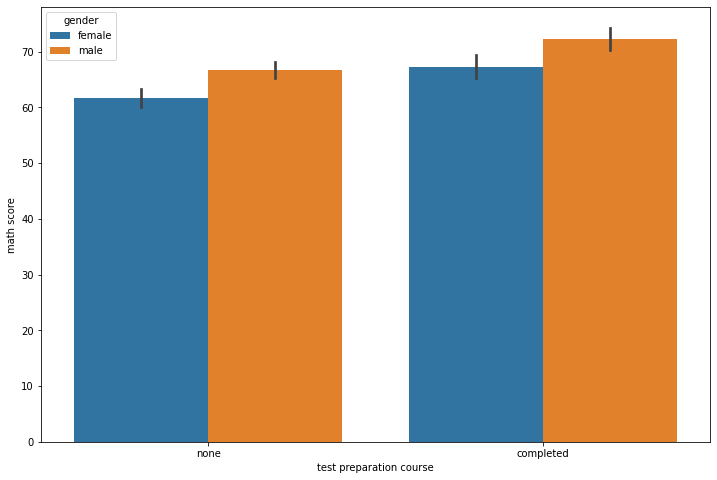

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x = "test preparation course", y = "math score", hue = "gender", data = df)

here exploring test preparation scores and test scores, seperating them by race, if any race has done better than the other

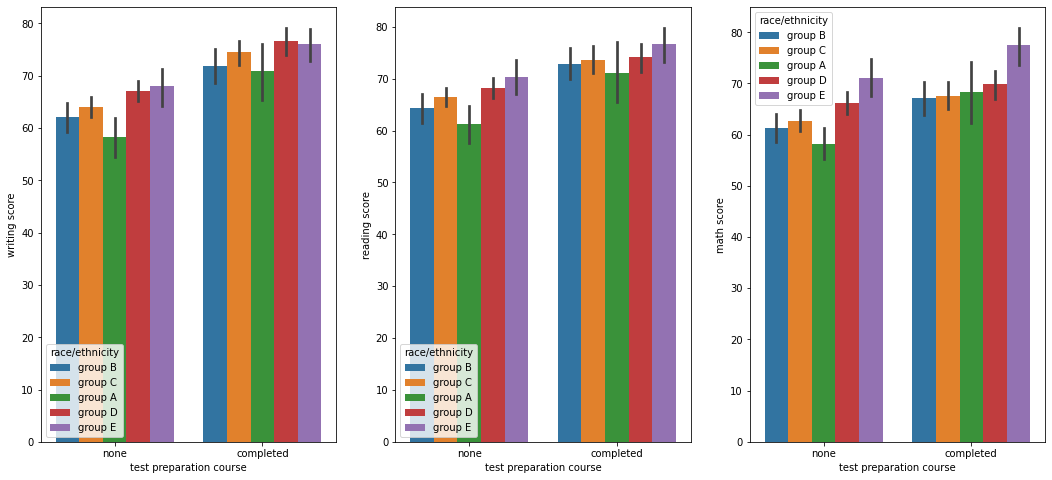

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.barplot(x = "test preparation course", y = "writing score", hue = "race/ethnicity", data = df)
plt.subplot(1,3,2)
sns.barplot(x = "test preparation course", y = "reading score", hue = "race/ethnicity", data = df)
plt.subplot(1,3,3)
sns.barplot(x = "test preparation course", y = "math score", hue = "race/ethnicity", data = df)

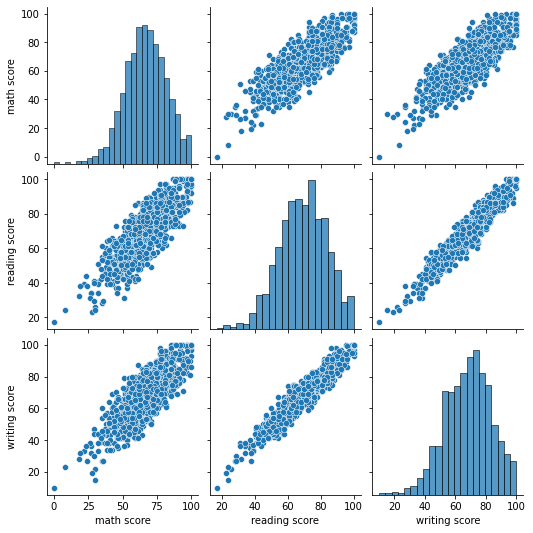

In [ ]:
sns.pairplot(df)

voilin plot to better visualise the data, as it combines box plot with pdf

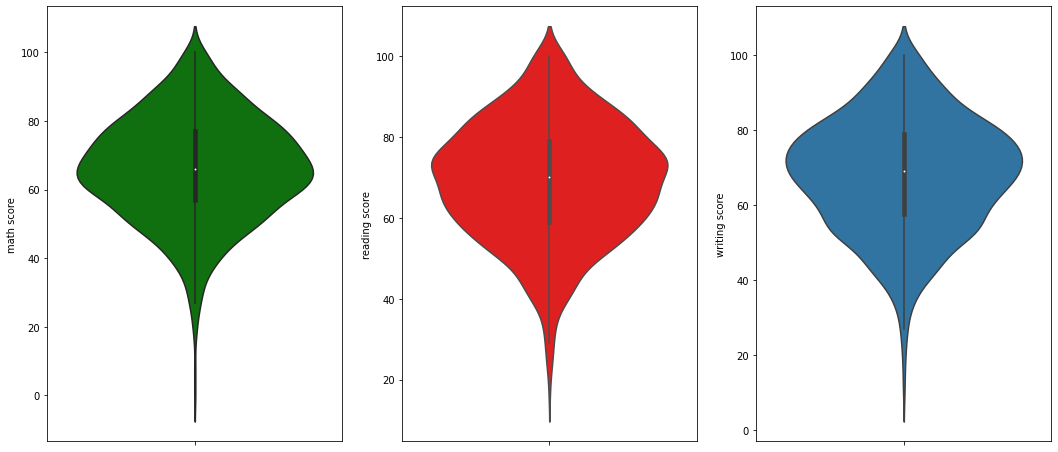

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 3,1)
sns.violinplot(y='math score',data=df,color='green')
plt.subplot(1, 3, 2)
sns.violinplot(y='reading score',data=df,color='red')
plt.subplot(1, 3, 3)
sns.violinplot(y='writing score',data=df)

exloring race count through piechart

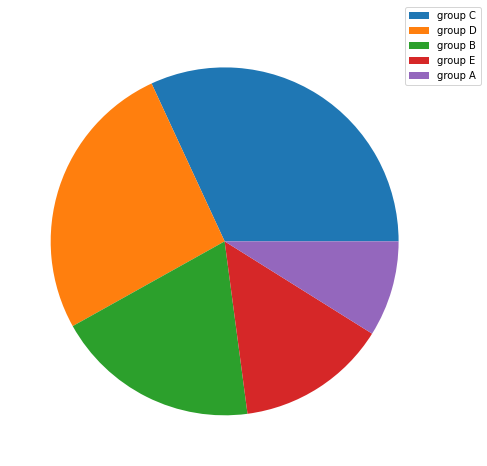

In [ ]:
plt.figure(figsize=(18,8))

plt.pie(df['race/ethnicity'].value_counts())
plt.legend(df['race/ethnicity'].value_counts().index.tolist(),bbox_to_anchor=(1.1, 1.05))


exploring test/scores by their race, seperating on gender

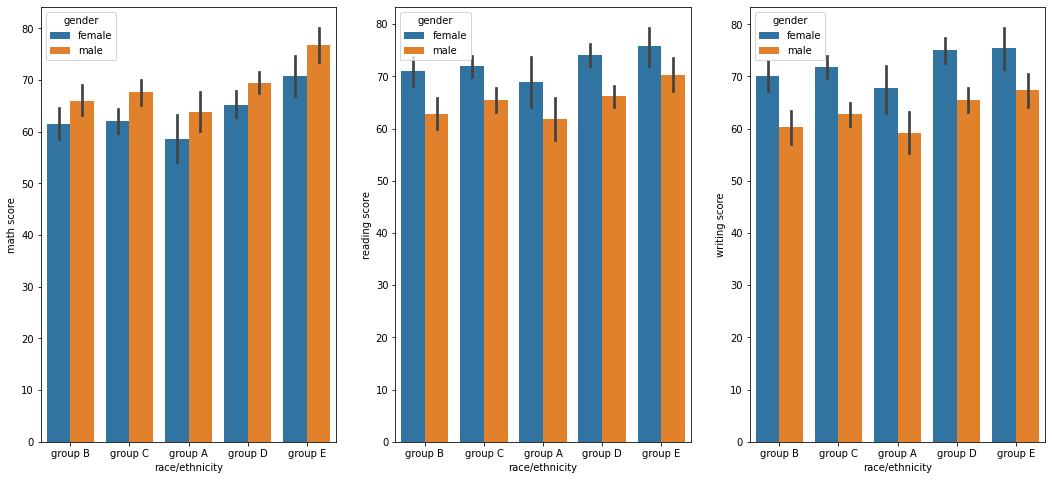

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender')

plt.subplot(1, 3, 2)
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender')

plt.subplot(1, 3, 3)

sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender')

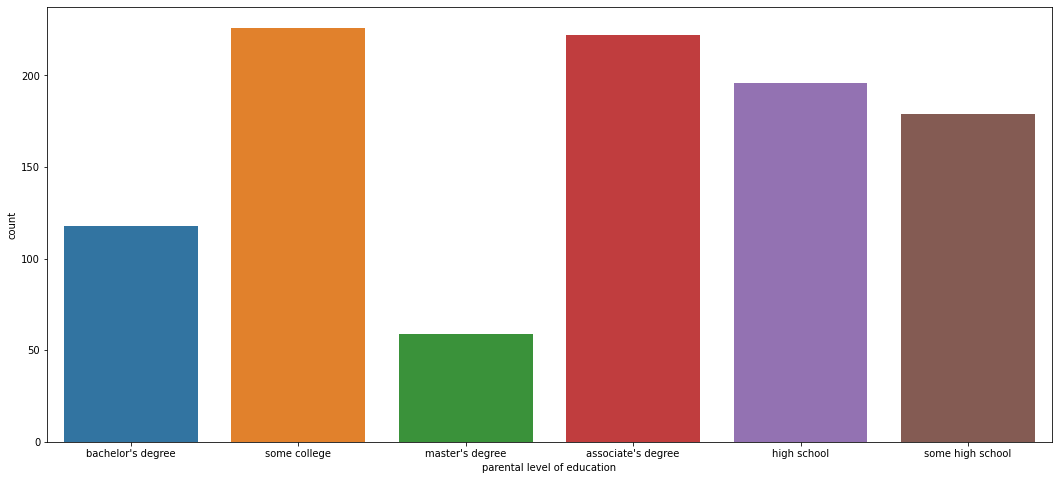

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='parental level of education',data=df)
